# Transformers and Hugging Face

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import transformers
from transformers import pipeline

# Modelos disponíveis em Hugging Face (https://huggingface.co/)
# https://huggingface.co/pierreguillou/bert-base-cased-squad-v1.1-portuguese
# Modelo BERT base para encontrar uma resposta a uma pergunta em um texto 
# (se chama BERT QA ou BERT Question Answering), é o tipo de modelo usado pelo Google Search!
qea = pipeline('question-answering', model='pierreguillou/bert-base-cased-squad-v1.1-portuguese')

context = r"""
A pandemia de COVID-19, também conhecida como pandemia de coronavírus, é uma pandemia em curso de COVID-19, 
uma doença respiratória aguda causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2). 
A doença foi identificada pela primeira vez em Wuhan, na província de Hubei, República Popular da China, 
em 1 de dezembro de 2019, mas o primeiro caso foi reportado em 31 de dezembro do mesmo ano. 
Acredita-se que o vírus tenha uma origem zoonótica, porque os primeiros casos confirmados 
tinham principalmente ligações ao Mercado Atacadista de Frutos do Mar de Huanan, que também vendia animais vivos. 
Em 11 de março de 2020, a Organização Mundial da Saúde declarou o surto uma pandemia. Até 8 de fevereiro de 2021, 
pelo menos 105 743 102 casos da doença foram confirmados em pelo menos 191 países e territórios, 
com cerca de 2 308 943 mortes e 58 851 440 pessoas curadas.
"""
question = 'Quando começou a pandemia?'
search = qea(question=question, context=context)
print(search['score'], search['answer'])

0.7371505498886108 1 de dezembro de 2019


# Open IA

In [ ]:
!pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 13.8 MB/s eta 0:00:00


In [ ]:
import openai

openai.api_key = ''

response = openai.Completition.create(
    model='text-davinci-003',
    prompt='Quais doenças são causadas por Pseudomonas aeruginosa?',
    max_tokens=4000
)
print(response.choices[0].text)

# Text Mining with NLTK

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/07/nltk-a-beginners-hands-on-guide-to-natural-language-processing/
!pip install --user -U nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
import matplotlib.pyplot as plt
import matplotlib.colors
import nltk # https://www.nltk.org/howto/corpus.html
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import string
import pandas as pd

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
stopwords = stopwords.words('english')

In [60]:
corpus = PlaintextCorpusReader('files', '.*', encoding='ISO-8859-1') 
files = corpus.fileids()
print(len(files))

1


In [57]:
print(corpus.raw())

 99.94	21778	21778	U	0	unclassified
  0.06	14	0	R	1	root
  0.06	13	0	D	10239	  Viruses
  0.06	13	0	D1	2559587	    Riboviria
  0.06	13	0	K	2732396	      Orthornavirae
  0.06	13	0	P	2732408	        Pisuviricota
  0.06	13	0	C	2732506	          Pisoniviricetes
  0.06	13	0	O	76804	            Nidovirales
  0.06	13	0	O1	2499399	              Cornidovirineae
  0.06	13	0	F	11118	                Coronaviridae
  0.06	13	0	F1	2501931	                  Orthocoronavirinae
  0.06	13	0	G	694002	                    Betacoronavirus
  0.06	13	0	G1	2509511	                      Sarbecovirus
  0.06	13	0	S	694009	                        Severe acute respiratory syndrome-related coronavirus
  0.06	13	13	S1	2697049	                          Severe acute respiratory syndrome coronavirus 2
  0.00	1	0	R1	131567	  cellular organisms
  0.00	1	0	D	2	    Bacteria
  0.00	1	0	P	1224	      Proteobacteria
  0.00	1	0	C	1236	        Gammaproteobacteria
  0.00	1	0	O	91347	          Enterobacterales
  0.00	1	1	F	543	      

In [33]:
words = corpus.words()
print(len(words))

245


In [34]:
words_nostop = [w for w in words if w not in stopwords]
print(len(words_nostop))

238


In [36]:
words_nostop_noponctuation = [w for w in words_nostop if w not in string.punctuation]
print(len(words_nostop_noponctuation))

199


In [70]:
words_nostop_noponctuation_nonumber = [w for w in words_nostop_noponctuation if (not w.isnumeric()) and len(w) > 1]
print(len(words_nostop_noponctuation_nonumber))

78


In [71]:
word_frequency = FreqDist(words_nostop_noponctuation_nonumber)

In [72]:
word_frequency.most_common(10)

[('Severe', 2),
 ('acute', 2),
 ('respiratory', 2),
 ('syndrome', 2),
 ('coronavirus', 2),
 ('Illumina', 2),
 ('Other', 2),
 ('User', 2),
 ('sample', 2),
 ('The', 2)]

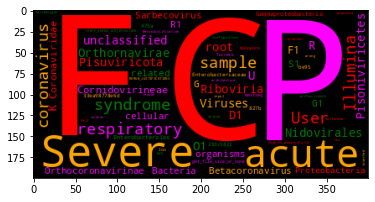

In [73]:
colormap = matplotlib.colors.ListedColormap(['orange', 'green', 'magenta', 'red'])
word_cloud = WordCloud(stopwords=stopwords, colormap=colormap)
word_cloud.generate(corpus.raw())
plt.imshow(word_cloud)